# Caltech Machine Learning Homework # 1

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

Instructions: https://work.caltech.edu/homework/hw1.pdf

Answers: http://work.caltech.edu/homework/hw1_sol.pdf

## The Learning Problem

### 1. What types of Machine Learning, if any, best describe the following three scenarios: 

(i) A coin classification system is created for a vending machine. The developers obtain exact coin specifications from the U.S. Mint and derive
a statistical model of the size, weight, and denomination, which the vending machine then uses to classify coins.

(ii) Instead of calling the U.S. Mint to obtain coin information, an algorithm is
presented with a large set of labeled coins. The algorithm uses this data to
infer decision boundaries which the vending machine then uses to classify
its coins.

(iii) A computer develops a strategy for playing Tic-Tac-Toe by playing repeatedly and adjusting its strategy by penalizing moves that eventually lead
to losing.

---

[a] (i) Supervised Learning, (ii) Unsupervised Learning, (iii) Reinforcement
Learning

[b] (i) Supervised Learning, (ii) Not learning, (iii) Unsupervised Learning

[c] (i) Not learning, (ii) Reinforcement Learning, (iii) Supervised Learning

[d] (i) Not learning, (ii) Supervised Learning, (iii) Reinforcement Learning

[e] (i) Supervised Learning, (ii) Reinforcement Learning, (iii) Unsupervised
Learning

**My answer:**

 <font color='green'>d</font>

### 2. Which of the following problems are best suited for Machine Learning?

(i) Classifying numbers into primes and non-primes.

(ii) Detecting potential fraud in credit card charges.

(iii) Determining the time it would take a falling object to hit the ground.

(iv) Determining the optimal cycle for traffic lights in a busy intersection.

---

[a] (ii) and (iv)

[b] (i) and (ii)

[c] (i), (ii), and (iii)

[d] (iii)

[e] (i) and (iii)

**My answer:**

 <font color='green'>a</font>

## Bins and Marbles

### 3. We have 2 opaque bags, each containing 2 balls. 
One bag has 2 black balls and the other has a black ball and a white ball. 
You pick a bag at random and then pick one of the balls in that bag at random.
When you look at the ball, it is black. You now pick the second ball from that same bag. What is the
probability that this ball is also black?


[a] 1/4

[b] 1/3

[c] 1/2

[d] 2/3

[e] 3/4

**My answer:**

P("Black ball at start") = 0.75

P("White ball at start") = 0.25

P("Black ball after having picked one black") = 2/3
 
 <font color='green'>d</font>

---

Consider a sample of 10 marbles drawn from a bin containing red and green marbles.

The probability that any marble we draw is red is µ = 0.55 (independently, with
replacement). 

We address the probability of getting no red marbles (ν = 0) in the
following cases:

### 4. We draw only one such sample.
Compute the probability that ν = 0. The closest answer is (‘closest answer’ means: `|your answer−given option|` is closest to 0):
    
[a] 7.331 × 10−6

[b] 3.405 × 10−4

[c] 0.289

[d] 0.450

[e] 0.550

**My answer:**

In [4]:
p_greenMarble = 0.45
p_tenGreenMarbles = p_greenMarble ** 10

p_tenGreenMarbles

0.00034050628916015635

 <font color='green'>b</font>

### 5. We draw 1,000 independent samples. 
Compute the probability that (at least) one of the samples has ν = 0. The closest answer is:
    
[a] 7.331 × 10−6

[b] 3.405 × 10−4

[c] 0.289

[d] 0.450

[e] 0.550


**My answer:**

P("At least one sample has ν = 0") = 1 - P("No sample has ν = 0")

In [7]:
N = 1000
p_oneSampleHasNu0 = p_tenGreenMarbles
p_noSampleHasNu0 = (1-p_oneSampleHasNu0) ** N
p_atLeastOneSampleHasNu0 = 1 - p_noSampleHasNu0

p_atLeastOneSampleHasNu0

0.28863119784980995

 <font color='green'>c</font>

## Feasibility of Learning

![Feasibility of Learning](imgs/feasibility_of_learning.png)

### 6. Which hypothesis g agrees the most with the possible target functions in terms of the above score?

[a] g returns 1 for all three points.

[b] g returns 0 for all three points.

[c] g is the XOR function applied to x, i.e., if the number of 1s in x is odd, g
returns 1; if it is even, g returns 0.

[d] g returns the opposite of the XOR function: if the number of 1s is odd, it
returns 0, otherwise returns 1.

[e] They are all equivalent (equal scores for g in [a] through [d]).

**My answer:**

```
x6 = {1, 0, 1}
x7 = {1, 1, 0}
x8 = {1, 1, 1}

h1(x6, x7, x8) = {0, 0, 0}
h2(x6, x7, x8) = {0, 0, 1}
h3(x6, x7, x8) = {0, 1, 0}
h4(x6, x7, x8) = {0, 1, 1}
h5(x6, x7, x8) = {1, 0, 0}
h6(x6, x7, x8) = {1, 0, 1}
h7(x6, x7, x8) = {1, 1, 0}
h8(x6, x7, x8) = {1, 1, 1}
```

[a] 
g(x6, x7, x8) = {1, 1, 1}

In [3]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

[b] 
g(x6, x7, x8) = {0, 0, 0}

In [4]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

[c] 
g(x6, x7, x8) = XOR(x6, x7, x8) = {0, 0, 1}

In [5]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

 ...
 Looks like they're all equivalent!
 <font color='green'>e</font>

## The Perceptron Learning Algorithm

![PLA](imgs/pla.png)

Random Point 1: [ 0.45159516 -0.38176686]
Random Point 2: [0.48564309 0.67881081]


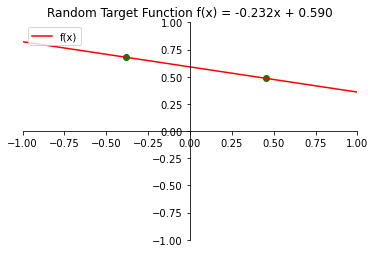

In [3]:
p1 = np.random.uniform(-1, 1, size=2)
p2 = np.random.uniform(-1, 1, size=2)

print('Random Point 1:', p1)
print('Random Point 2:', p2)

coefficients = np.polyfit(p1, p2, 1)
m,c = coefficients

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(-1,1, 100)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
ax = plt.figure().add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

plt.plot( p1[0], p2[0], 'go' )
plt.plot( p1[1], p2[1], 'go' )
plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {m:.3f}x + {c:.3f}')
plt.legend(loc='upper left')

plt.show()

### 7. Take N = 10. 
How many iterations does it take on average for the PLA to converge for N = 10 training points?

Pick the value closest to your results
(again, ‘closest’ means: |your answer − given option| is closest to 0).

[a] 1

[b] 15

[c] 300

[d] 5000

[e] 10000

In [66]:
N = 10
x = np.random.uniform(-1, 1, size=(10,2))
x

array([[ 0.40728772, -0.11154919],
       [-0.99396687, -0.5839794 ],
       [-0.7061419 ,  0.05383565],
       [ 0.23615755, -0.48773337],
       [ 0.98783431,  0.15764671],
       [-0.20520328,  0.50692322],
       [ 0.66396592,  0.71700739],
       [ 0.89736268, -0.30779945],
       [ 0.60747723,  0.2091331 ],
       [-0.24073375,  0.7194516 ]])

With `a` and `b` the polynomial coefficients, the side of the line that a point "lands" on is given by

```
sign(ax+by-d)
```

![Illustration](https://i.stack.imgur.com/5H6z3.png)

...where we take being on the line exactly as 0, which will always be misclassified.

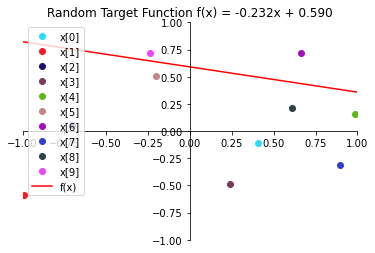

In [67]:
# ...and plot the points and the line
ax = plt.figure().add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

for i,randomPoint in enumerate(x):
    plt.plot( randomPoint[0], randomPoint[1], 'mo', label=f'x[{i}]', c=np.random.rand(3,) )
    

plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {m:.3f}x + {c:.3f}')
plt.legend(loc='upper left')

plt.show()

```
y = mx + c
mx - y = -c

so to put it in the form ax + by = d
```




Introducing bias

In [70]:
xWithBias = np.insert(x, 0, 1, axis=1)
xWithBias

array([[ 1.        ,  0.40728772, -0.11154919],
       [ 1.        , -0.99396687, -0.5839794 ],
       [ 1.        , -0.7061419 ,  0.05383565],
       [ 1.        ,  0.23615755, -0.48773337],
       [ 1.        ,  0.98783431,  0.15764671],
       [ 1.        , -0.20520328,  0.50692322],
       [ 1.        ,  0.66396592,  0.71700739],
       [ 1.        ,  0.89736268, -0.30779945],
       [ 1.        ,  0.60747723,  0.2091331 ],
       [ 1.        , -0.24073375,  0.7194516 ]])

In [85]:
a = m
b = -1
d = -c
def y(x):
    assert isinstance(x, np.ndarray)
    assert x.shape == (2,)
    return np.sign(a*x[0]+b*x[1]-d).astype(int)

print('Correct Classifications:')
for point in x:
    print(y(point))

Correct Classifications:
1
1
1
1
1
1
-1
1
1
-1


In [72]:
# Initialize weights at zero
w = np.zeros_like(xWithBias)
w

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [73]:
sum0 = int(np.sign(w[0][0]*xWithBias[0][0]+w[0][1]*xWithBias[0][1]+w[0][2]*xWithBias[0][2]))
print(sum0)

mat0 = int(np.sign( np.dot( np.transpose(w[0]), xWithBias[0] ) ))
print(mat0)

## Perceptron model
def h(point,weights):
    return int(np.sign( np.dot( np.transpose(weights), point ) )) 

0
0


In [74]:
# Initial application of perceptron model
for n,point in enumerate(xWithBias):
    print(h(point, w[n]))

0
0
0
0
0
0
0
0
0
0


![PLA](https://miro.medium.com/max/516/1*PbJBdf-WxR0Dd0xHvEoh4A.png)

In [94]:
# PLA
def converges():    
    for n,point in enumerate(x):
            assert isinstance(point, np.ndarray)
            assert point.shape == (2,)
            
            if h(xWithBias[n], w[n]) != y(point):
                return False
    return True

counter = 0
while(!converges()):
    counter =+ 1
    print(f'PLA Iteration {counter}')

SyntaxError: invalid syntax (<ipython-input-94-88896c926042>, line 12)